In [43]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
#importing the dataset
bike = pd.read_csv('YuluDulu Dataset.csv')

### Checking the data 

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Dictionary
- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	


### Preparing the data

In [7]:
#dropping unwanted columns for the model 
bike.drop(columns=['instant','dteday','casual','registered'],inplace=True)

In [8]:
#changing the datatype of categorical variables 
categorical_var=['season','yr','mnth','holiday','workingday','weathersit','weekday']
bike[categorical_var]=bike[categorical_var].astype(str)

In [9]:
#checking the data types
bike.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## EDA 

### Understanding relation between various continuous variables 

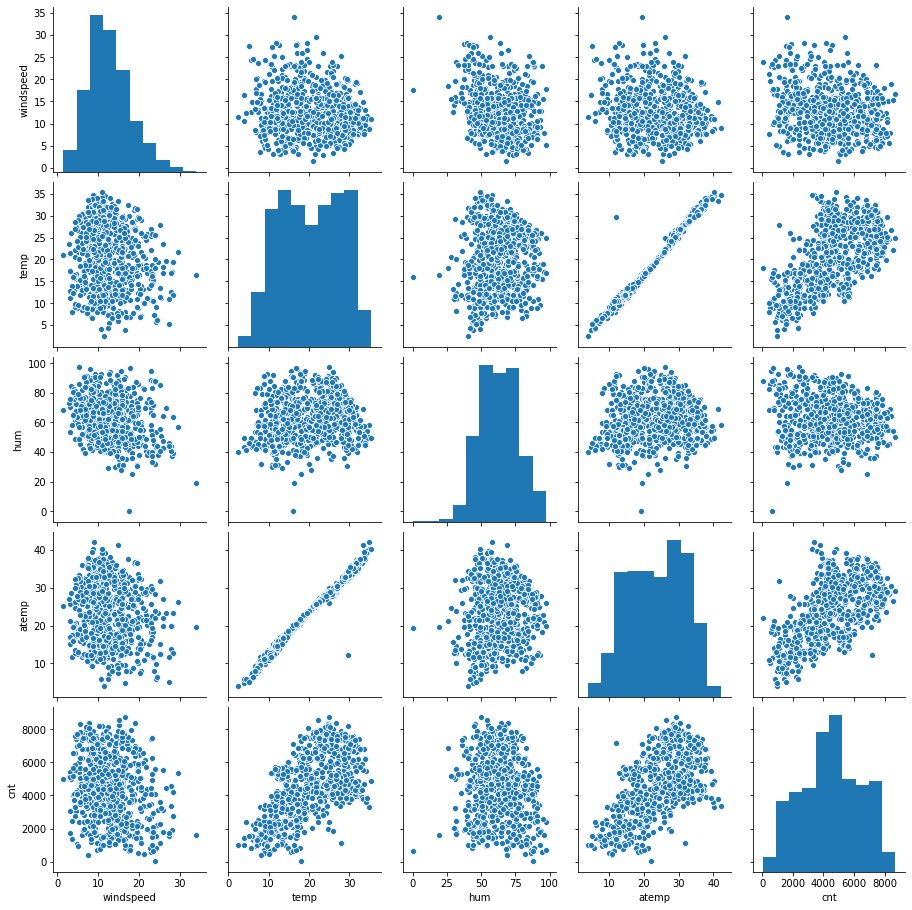

In [11]:
#pairplot
continuous_var=list(set(bike.columns).difference(set(categorical_var)))
sbn.pairplot(bike[continuous_var])

### Correlation matrix to understand relation between all the variables 

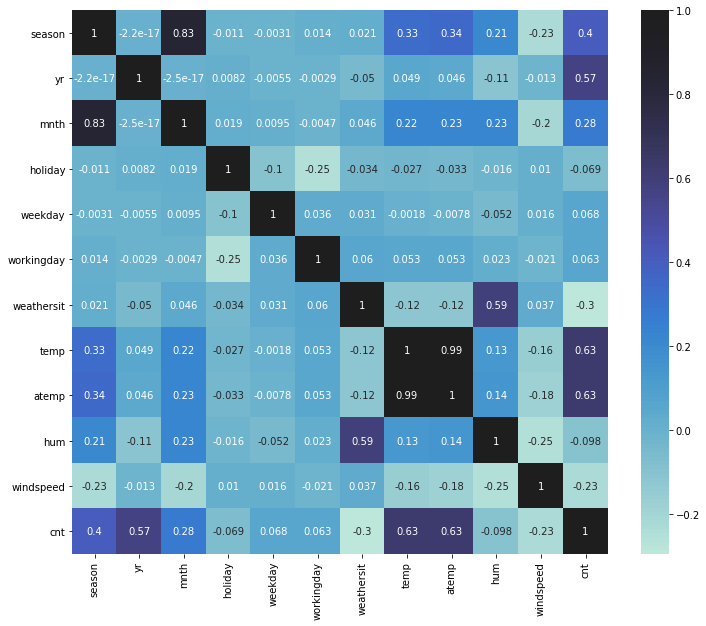

In [12]:

plt.figure(figsize=(12,10))
corr=bike.astype(int).corr()
sbn.heatmap(corr,annot=True, center=1)


### Checking the best correlation variables with target variable 'cnt'

In [13]:
c=corr.where(np.triu((np.ones(corr.shape)),k=1).astype(bool))
c=c.unstack().reset_index()
c=c.dropna(subset=[0])
c[c['level_0']=='cnt'].sort_values(by=0, ascending=False)

,level_0,level_1,0
140,cnt,atemp,0.629747
139,cnt,temp,0.626290
133,cnt,yr,0.569728
132,cnt,season,0.404584
134,cnt,mnth,0.278191
136,cnt,weekday,0.067534
137,cnt,workingday,0.062542
135,cnt,holiday,-0.068764
141,cnt,hum,-0.098060
142,cnt,windspeed,-0.233517


### Understanding relation between various Categorical variables 

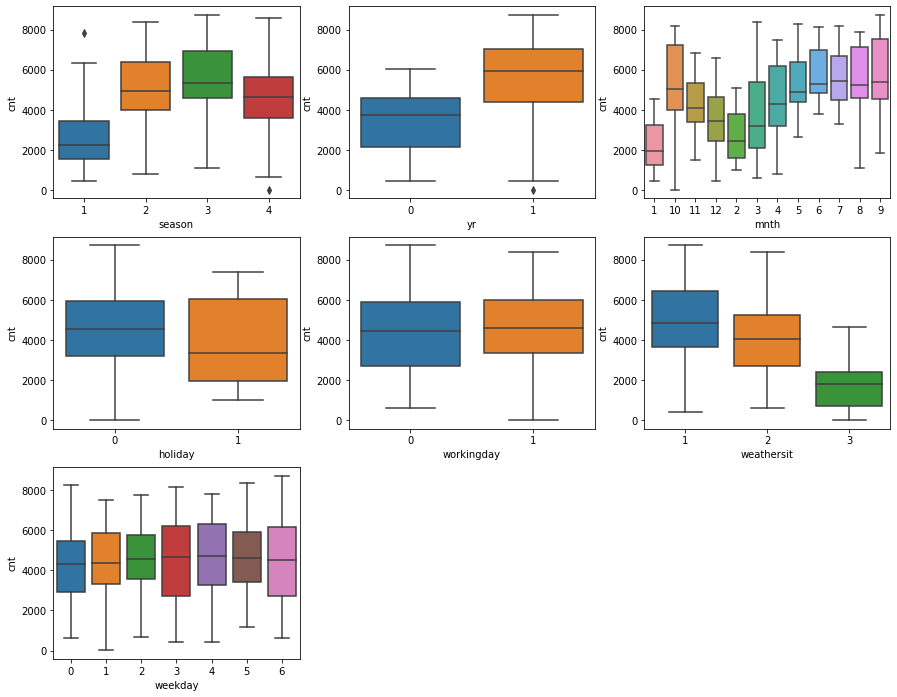

In [14]:
#comparison 
plt.figure(figsize=(15,12))
for i,j in enumerate (categorical_var): 
    plt.subplot(3,3,i+1)
    sbn.boxplot(y='cnt',x=j,data=bike)
plt.show()    

In [15]:
# Creating dummy variables
bike=pd.get_dummies(bike, columns=['mnth','season'],drop_first=True)


In [16]:
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,season_2,season_3,season_4
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Changing the data type so that there's no issue while doing VIF
bike=bike.astype(float)

In [18]:
#test train split
bike_train, bike_test=train_test_split(bike, train_size=0.7, random_state=100)

In [19]:
#checking post split
print("parent_set",bike.shape)
print("train_set",bike_train.shape)
print("test_set",bike_test.shape)

parent_set (730, 24)
train_set (510, 24)
test_set (220, 24)


### Rescaling the data

In [20]:
#rescaling continuour variables only
scaler=MinMaxScaler()
bike_train[continuous_var]=scaler.fit_transform(bike_train[continuous_var])

In [21]:
bike_train.describe()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,season_2,season_3,season_4
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.990196,0.676471,1.403922,0.537440,0.513156,0.650480,0.320883,0.513499,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.247059,0.262745,0.247059
std,0.500429,0.157763,2.017093,0.468282,0.547888,0.225858,0.212410,0.145846,0.169803,0.224421,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.431725,0.440557,0.431725
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.339853,0.332086,0.538643,0.199179,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,2.000000,0.735215,0.688457,0.754830,0.414447,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#separating dependent and independent variables
y_train=bike_train.pop('cnt')
X_train=bike_train

### Creating a basic model before moving to the Main model

In [23]:
#creating a simple linear regression model
#using temperature as a predictor variable
# step 1 Adding a constant

X_train_sm=sm.add_constant(X_train['temp'])
lr=sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.46e-61
Time:                        12:55:35   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Feature Selection using RFE

In [24]:
#not a good R square do let's go to a automatic method of feature selection RFE
lr= LinearRegression()
rfe=RFE(lr,11)
rfe=rfe.fit(X_train,y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 13),
 ('workingday', False, 12),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_10', False, 7),
 ('mnth_11', False, 11),
 ('mnth_12', False, 10),
 ('mnth_2', False, 8),
 ('mnth_3', False, 3),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 5),
 ('mnth_7', False, 9),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1)]

In [26]:
rfe_cols=X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_8', 'mnth_9', 'season_2', 'season_4'],
      dtype='object')

In [27]:
#Building the model again with all the rfe_cols
X_train_rfe=sm.add_constant(X_train[rfe_cols])
lr=sm.OLS(y_train,X_train_rfe).fit()

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.93e-186
Time:                        12:55:35   Log-Likelihood:                 497.42
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3106      0.026     12.172      0.000       0.260       0.361
yr             0.2305      0.008     27.848      0.000       0.214       0.247
holiday       -0.0937      0.026     -3.581      0.000      -0.145      -0.042
weathersit    -0.0743      0.010     -7.753      0.000      -0.093      -0.055
temp           0.4746      0.134      3.551      0.000       0.212       0.737
atemp          0.0590      0.141      0.418      0.676      -0.218       0.336
hum           -0.1676      0.038     -4.382      0.000      -0.243      -0.092
windspeed     -0.1913      0.027     -7.195      0.000      -0.244      -0.139
mnth_8         0.0615      0.017      3.667      0.000       0.029       0.094
mnth_9         0.1238      0.017      7.480      0.000       0.091       0.156
season_2       0.1069      0.011      9.596      0.000       0.085       0.129
season_4       0.1429      0.011     13.083      0.000       0.121       0.164
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.342
Skew:                          -0.640   Prob(JB):                     3.05e-34
Kurtosis:                       5.372   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,temp,54.41
5,atemp,53.65
0,const,38.95
6,hum,1.86
3,weathersit,1.65
8,mnth_8,1.46
10,season_2,1.38
11,season_4,1.33
7,windspeed,1.22
9,mnth_9,1.21


In [30]:
#removing the high p value and high VIF variable 
rfe_cols=list(rfe_cols)
rfe_cols.remove('atemp')

In [31]:
#revaluating
X_train_rfe=sm.add_constant(X_train[rfe_cols])
lr=sm.OLS(y_train,X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.29e-187
Time:                        12:55:35   Log-Likelihood:                 497.33
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     499   BIC:                            -926.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3115      0.025     12.259      0.000       0.262       0.361
yr             0.2305      0.008     27.870      0.000       0.214       0.247
holiday       -0.0941      0.026     -3.604      0.000      -0.145      -0.043
weathersit    -0.0745      0.010     -7.799      0.000      -0.093      -0.056
temp           0.5296      0.022     23.698      0.000       0.486       0.574
hum           -0.1665      0.038     -4.368      0.000      -0.241      -0.092
windspeed     -0.1934      0.026     -7.415      0.000      -0.245      -0.142
mnth_8         0.0605      0.017      3.647      0.000       0.028       0.093
mnth_9         0.1236      0.017      7.478      0.000       0.091       0.156
season_2       0.1074      0.011      9.689      0.000       0.086       0.129
season_4       0.1434      0.011     13.227      0.000       0.122       0.165
==============================================================================
Omnibus:                       62.111   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.114
Skew:                          -0.633   Prob(JB):                     9.31e-34
Kurtosis:                       5.357   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif.VIF,2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,38.68
5,hum,1.85
3,weathersit,1.64
4,temp,1.52
7,mnth_8,1.43
9,season_2,1.37
10,season_4,1.31
8,mnth_9,1.21
6,windspeed,1.17
1,yr,1.02


In [33]:
#predicting the 'cnt' (target variable)
y_train_pred=lr.predict(X_train_rfe)

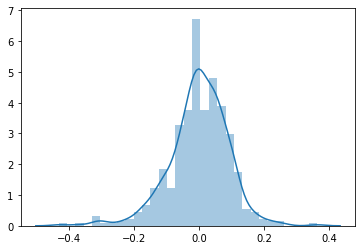

In [34]:
#checking the error if it's centered around zero and following the normal distribution
residual=y_train-y_train_pred
sbn.distplot(residual)
plt.show()

### Applying on Test data

In [35]:
#rescaling the test data
bike_test[continuous_var]=scaler.transform(bike_test[continuous_var])


In [36]:
#checkinmg after transformation using fit of training set
bike_test.describe()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,season_2,season_3,season_4
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,3.013636,0.700000,1.372727,0.558718,0.532847,0.638221,0.313293,0.522154,...,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.263636,0.245455,0.236364
std,0.500809,0.187620,1.985057,0.459303,0.538204,0.233187,0.217401,0.148694,0.159584,0.219163,...,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.441609,0.431338,0.425817
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.355429,0.344870,0.529197,0.198843,0.378595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,2.000000,0.755981,0.713308,0.743798,0.402718,0.677750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#creating independent and independent variables
y_test=bike_test.pop('cnt')
X_test=bike_test

In [38]:
#test data prediction
X_test_new=sm.add_constant(X_test[rfe_cols])
y_test_pred=lr.predict(X_test_new)

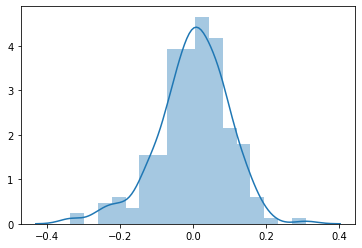

In [39]:
#Residual
residual_test=y_test-y_test_pred
sbn.distplot(residual_test)
plt.show()

### Model Evaluation

In [40]:
#R2_Score check of test data
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8026412242474988

Text(0.5, 0, 'y_test_pred')

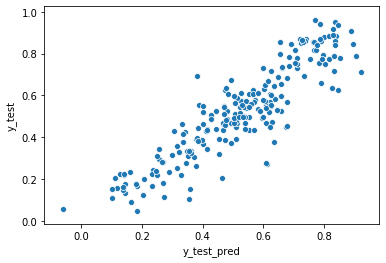

In [41]:
#checking the relationship between predicted values and actual values
sbn.scatterplot(x=y_test_pred,y=y_test)
plt.ylabel('y_test')
plt.xlabel('y_test_pred')

In [45]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

7.362699707689231
0.9436567667081119
0.9714199744230669


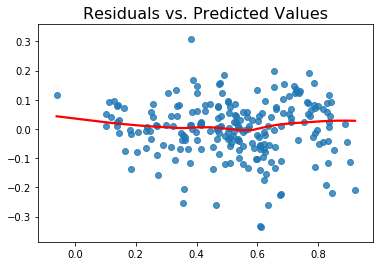

In [54]:
#Residuals vs Predicted Values 
sbn.regplot(x=y_test_pred, y=residual_test, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel='Predicted'
plt.ylabel='Residuals'